# Exercise 2 - Introduction to (Deep) Neural Networks

This exercise uses some images and information from the [CERN Deep Learning Tutorial](https://github.com/YaleATLAS/CERNDeepLearningTutorial)

# Table of Contents

* [1 Introduction to Keras](#Introduction-to-Keras)
* [2 Breast cancer dataset](#Breast-cancer-dataset)
    * [Loading the dataset](#Loading-the-dataset)
    * [Plotting the dataset](#Plotting-the-dataset)
    * [Preparing the dataset](#Preparing-the-dataset)
* [3 Training a dense neural network](#3Training-a-dense-neural-network)
    * [Neural network model](#Neural-network-model)
    * [Build a simple neural network](#Build-a-simple-neural-network)

# 1 Introduction to Keras

  <a href='http://keras.io'><img src='https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png' height=120></a>
 *  Modular, powerful and intuitive Deep Learning Python library built on
 <center>
 <a href='http://deeplearning.net/software/theano/'><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Theano_logo.svg/200px-Theano_logo.svg.png' height=45 ></a> and
 <a href='https://www.tensorflow.org/'><img src='https://upload.wikimedia.org/wikipedia/commons/a/ab/TensorFlow_logo.svg' height=60 vertical_align='center'></a> and
 <a href='https://docs.microsoft.com/en-us/cognitive-toolkit/'><img src='https://developer.nvidia.com/sites/default/files/akamai/cuda/images/deeplearning/cntk.png' height=80 vertical_align='center'></a>
 </center>


> <i>Developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research. </i>
<div align="right">
  https://keras.io
</div>

*  Minimalist, user-friendly interface
*  Extremely well documented, lots of <a href='https://github.com/fchollet/keras/tree/master/examples'>working examples</a>
*  Very shallow learning curve $\rightarrow$ by far one of the best tools for both beginners and experts
*  Open-source, developed and maintained by a community of contributors, and publicly hosted on <a href='https://github.com/fchollet/keras'>GitHub</a>
*  Extensible: possibility to customize layers

From the Keras website:

Guiding principles

- User friendliness. Keras is an API designed for human beings, not machines. It puts user experience front and center. Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear and actionable feedback upon user error.

- Modularity. A model is understood as a sequence or a graph of standalone, fully configurable modules that can be plugged together with as few restrictions as possible. In particular, neural layers, cost functions, optimizers, initialization schemes, activation functions and regularization schemes are all standalone modules that you can combine to create new models.

- Easy extensibility. New modules are simple to add (as new classes and functions), and existing modules provide ample examples. To be able to easily create new modules allows for total expressiveness, making Keras suitable for advanced research.

- Work with Python. No separate models configuration files in a declarative format. Models are described in Python code, which is compact, easier to debug, and allows for ease of extensibility.
<div align="right">
  https://keras.io - 16.4.2020
</div>


## 1.1 Tensorflow 2
While Keras was previously an independent package serving as an high-level API for Tensorflow, it is now fully integrated in [Tensorflow 2.0](https://www.tensorflow.org/guide/keras).

We will use Keras within Tensorflow 2 for all the following exercises. In order to use Tensorflow 2 in colab, we need to do some magic and then load it:


In [1]:
#Check if colab is running
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    %tensorflow_version 2.x

#import TF
import tensorflow as tf


2024-05-01 23:42:48.555401: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 23:42:48.555453: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 23:42:48.556197: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-01 23:42:48.561645: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 23:42:49.332071: W tensorflow/compiler/tf2

In the following we will check which TF version we have loaded, which python version we are using and if you have switched on the GPU runtime. It won't be important for this exercise, but you can choose between CPU, GPU and TPU (Tensor Processing Unit) by selecting in the menu `Runtime->Change runtime type`. Please select GPU in order to see the change. Also select Python 3 for all of the exercises.

In [2]:
import json, os
from platform import python_version

# Tested with TensorFlow 2.12.0
print('TF version={}, Python version={}, CUDA={}, GPU={}, TPU={}'.format(
    tf.__version__, python_version(), tf.test.is_built_with_cuda(),
    # GPU attached?
    len(tf.config.list_physical_devices('GPU')) > 0,
    # TPU accessible? (only works on Colab)
    'COLAB_TPU_ADDR' in os.environ))

TF version=2.15.0, Python version=3.10.13, CUDA=True, GPU=True, TPU=False


2024-05-01 23:42:50.083096: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 23:42:50.106201: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 23:42:50.106245: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


# 2 Breast cancer dataset

## Loading the dataset

### Task 1: For this exercise we want to use the breast cancer dataset from sci-kit learn. Prepare the dataset in the following way:
* Load the dataset (`load_breast_cancer`), inspect it and create a pandas `DataFrame` with name `df`.
* How many example and how many features do we have? What are the names of the classes? How many examples of each class do we have?
* Plot the mean radius and the mean smoothness of the training data in a 2D scatter plot for the two classes.

*hints*:
- remember what you did in the section **Scikit-learn's in-build datasets** of the first exercise

In [3]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Plotting the dataset

Pandas has also some nice built-in plotting features, for instance you can plot the histograms of the features:

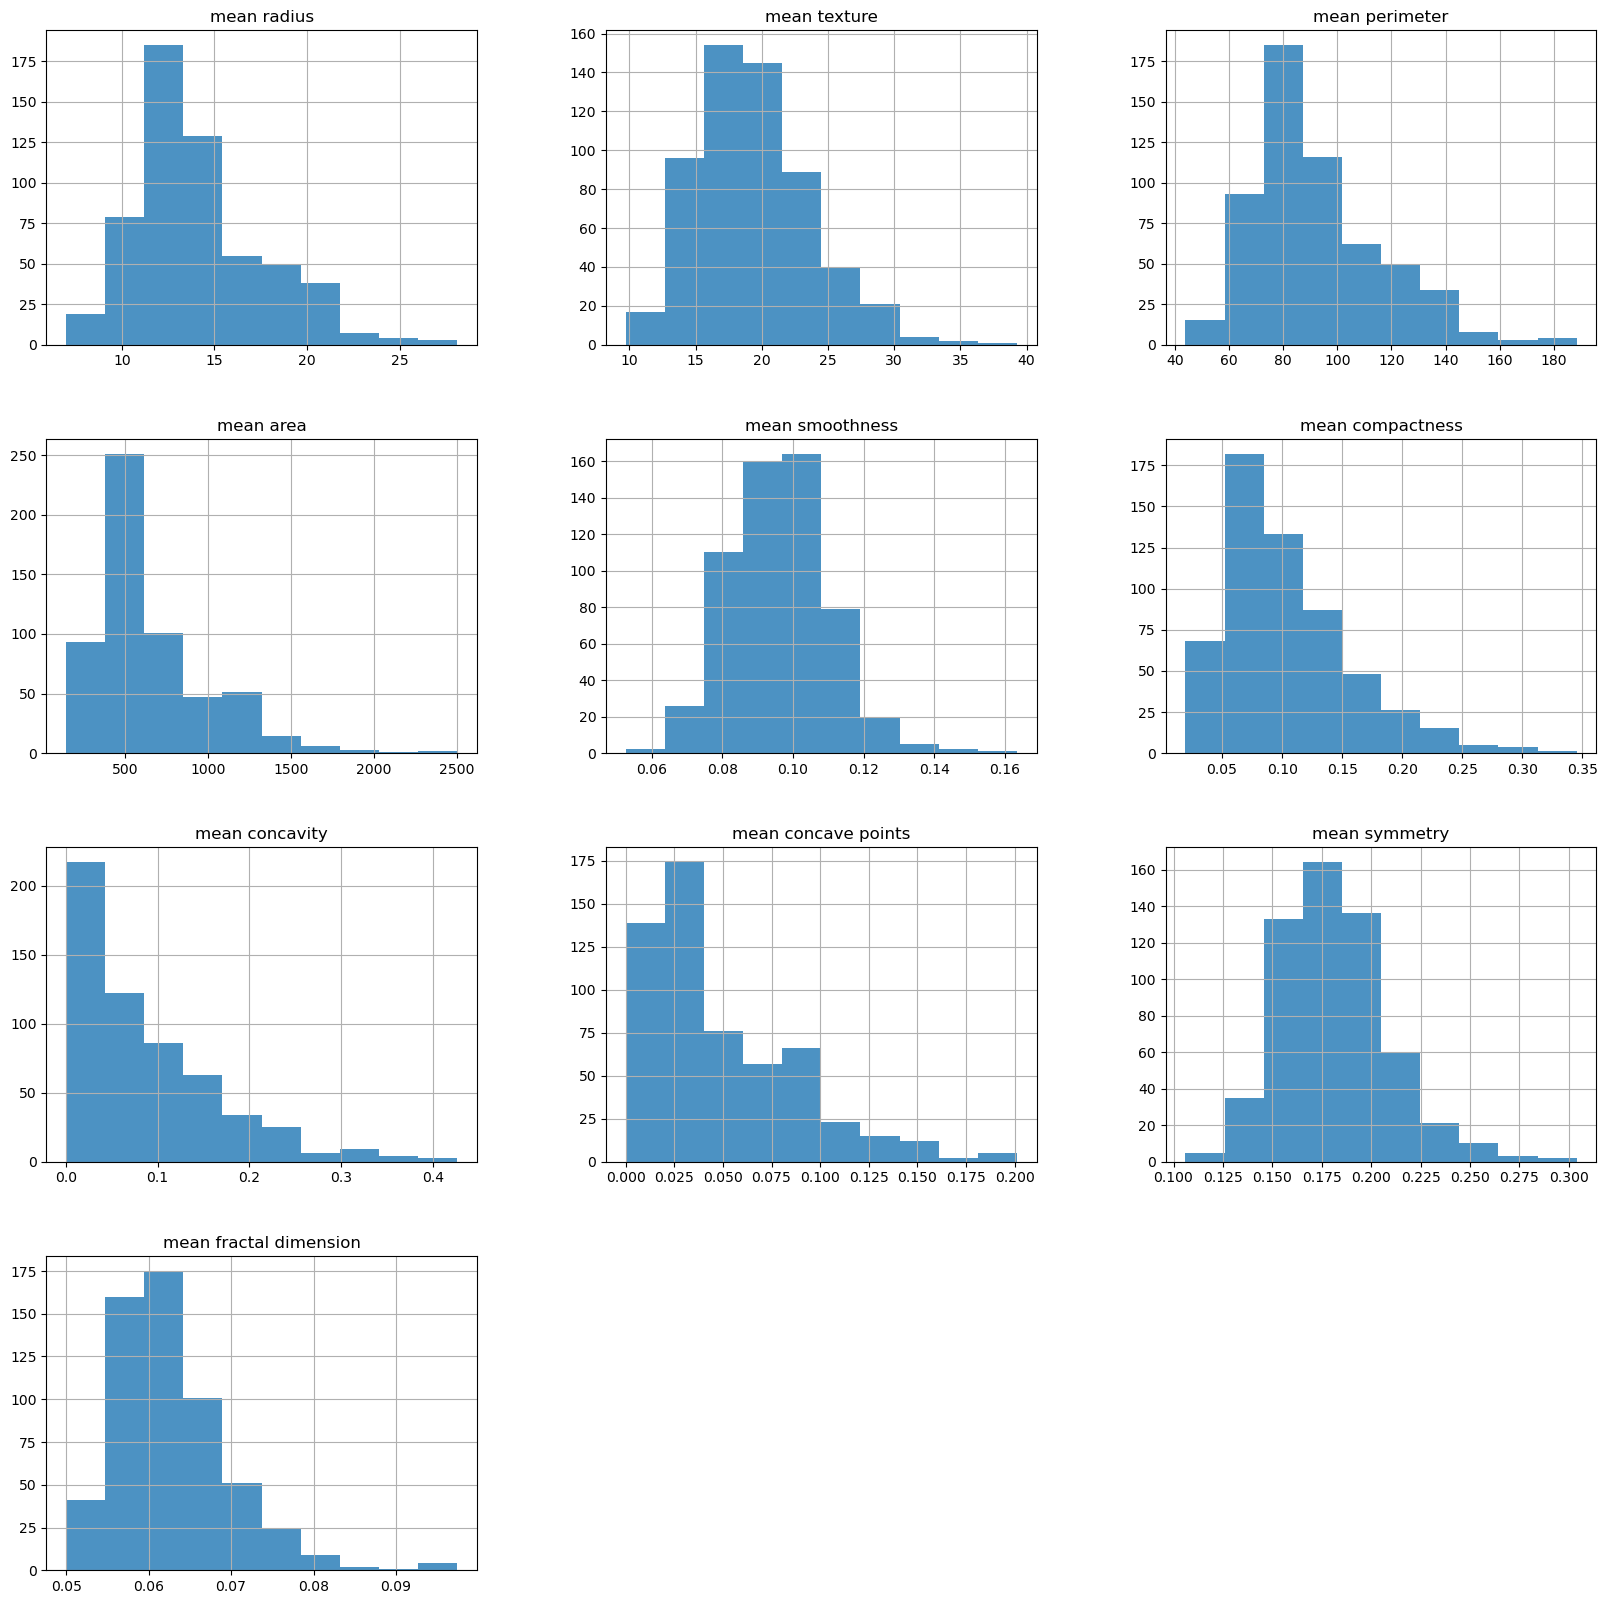

In [4]:
df[breast_cancer.feature_names[0:10]].hist(alpha=0.8, figsize=(20, 20))
plt.show()

What if we are interested in how the shape of a distribution differs between the two classes? We could simply add the target to the DataFrame:


*additional commment:*
pandas performs nearly all operations **not inplace** which means, that you don't override the existing data frame unless you explicitly do it like shown below. Just calling df.assign(...) won't change df!*

In [5]:
df = df.assign(target=breast_cancer.target)
df.keys()

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

And then use the useful groupby function and plot a kernel density estimate (kde) plot. kde is a very handy way to visualize a distribution without a lot of processing. A nice visualization of how a kde is produced and what it means can be found [here](https://mathisonian.github.io/kde/).

Text(0.5, 0, 'mean radius')

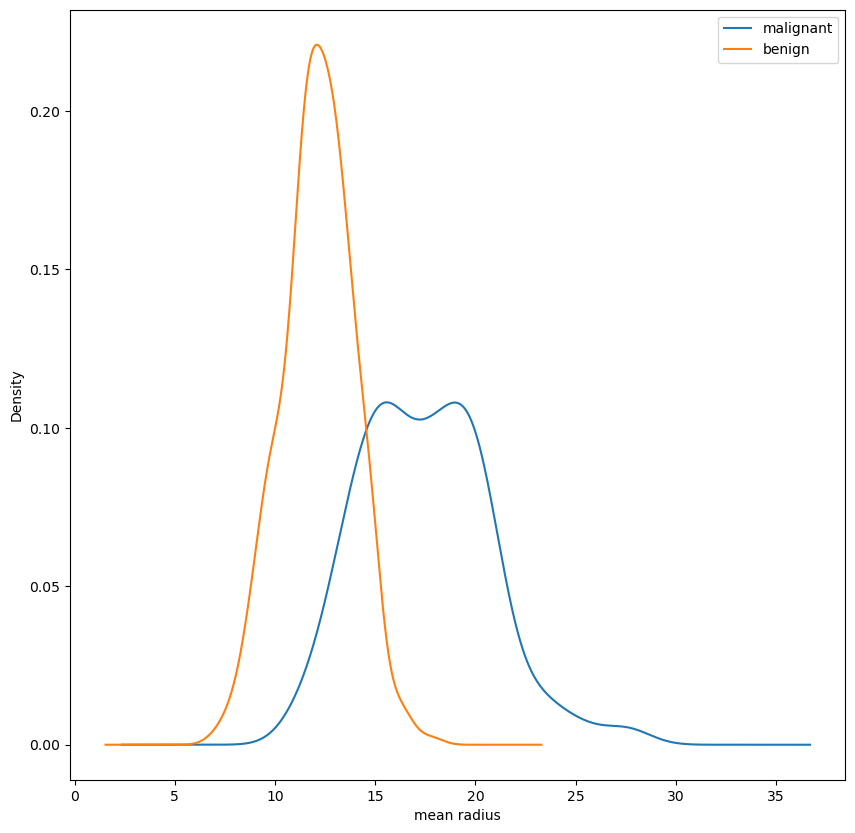

In [6]:
df.groupby("target")["mean radius"].plot(kind='kde', figsize=(10, 10))
plt.legend(['malignant', 'benign'], loc='upper right')
plt.xlabel('mean radius')

Similarly, we could also plot the histogram:

Text(0.5, 0, 'mean radius')

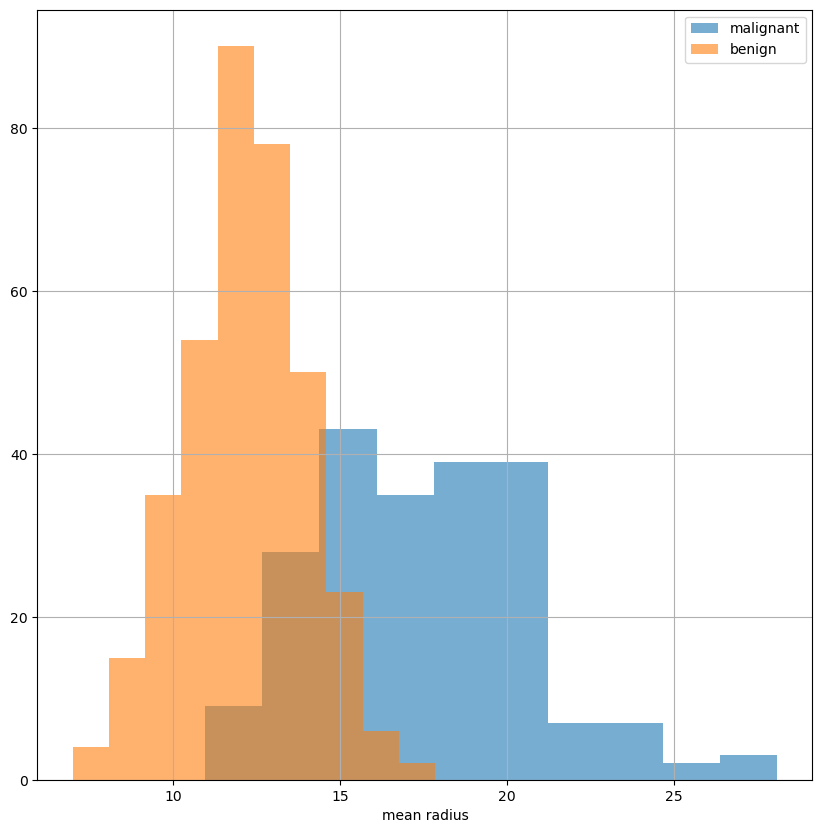

In [7]:
df.groupby("target")["mean radius"].hist(alpha=0.6, figsize=(10, 10))
plt.legend(['malignant', 'benign'], loc='upper right')
plt.xlabel('mean radius')

From a DataFrame you can even plot the full scatter plot matrix:

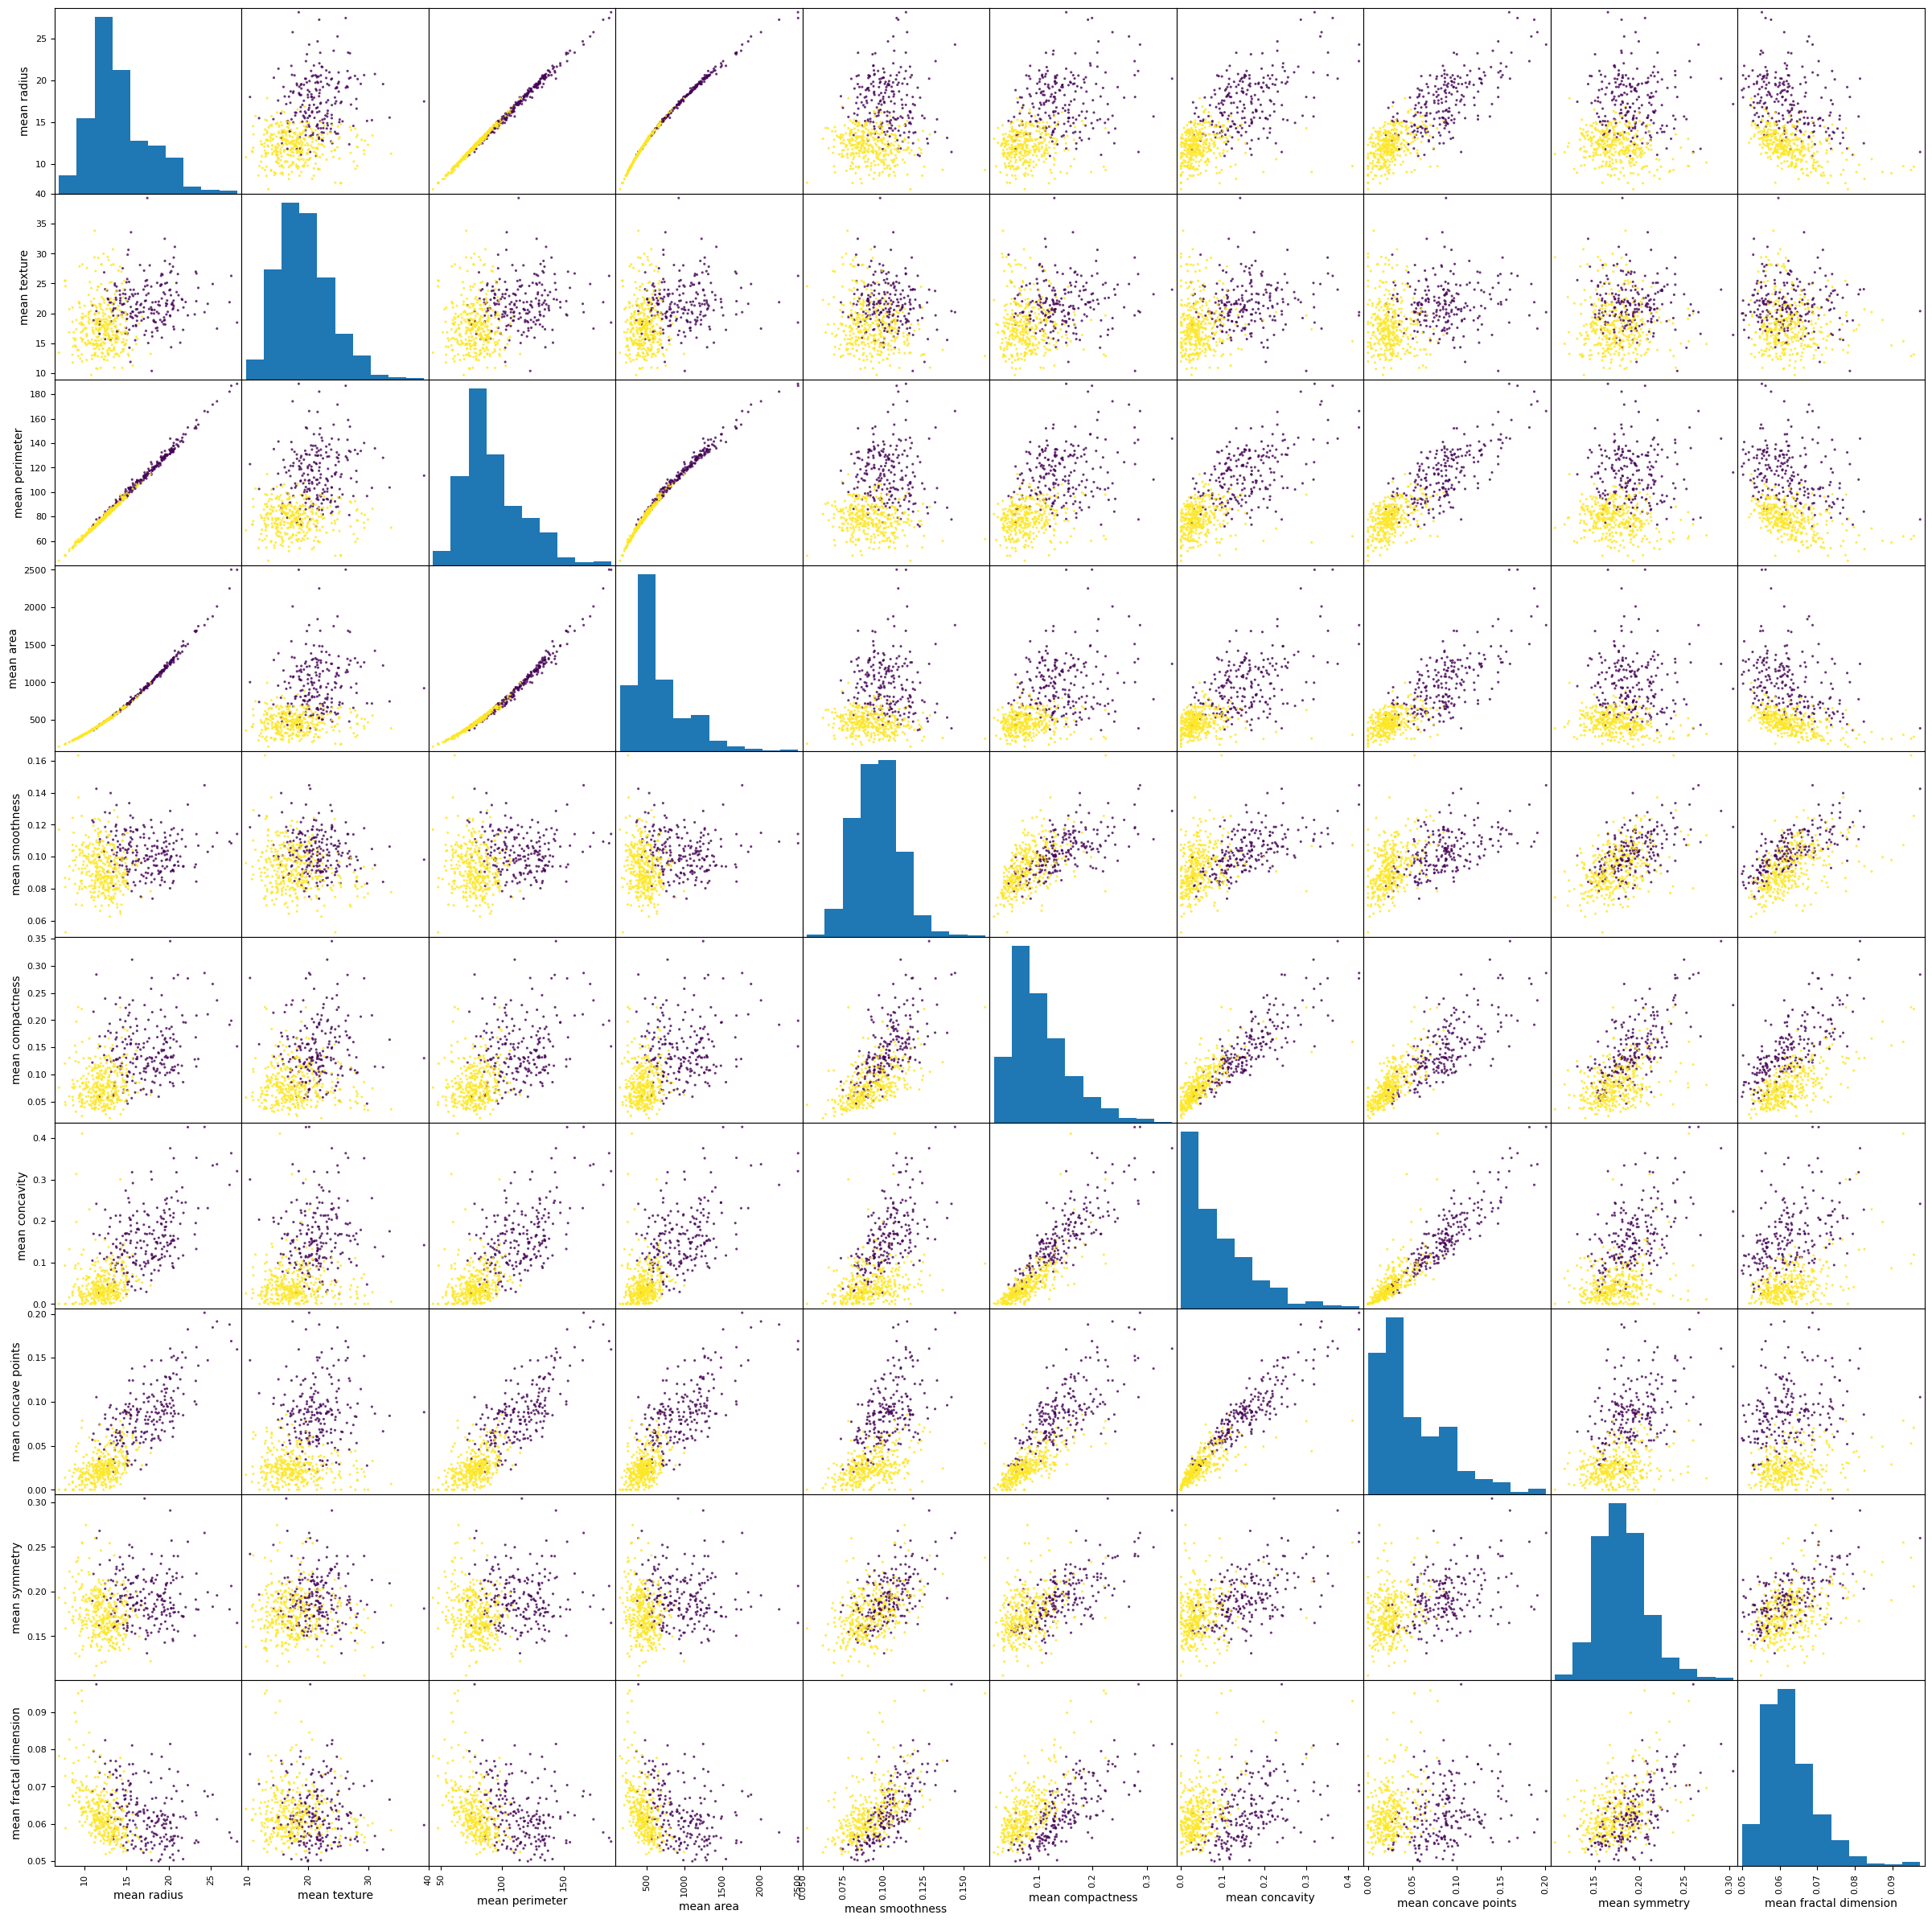

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[breast_cancer.feature_names[0:10]], c=breast_cancer.target, alpha=0.8, figsize=(30, 30), s=20)
plt.show()

Some of the input features seem highly correlated, so it usually makes sense to quantify their correlation to the other features.
We will now use seaborn: statistical data visualization to obtain the (linear) correlations between the input features.

https://seaborn.pydata.org/

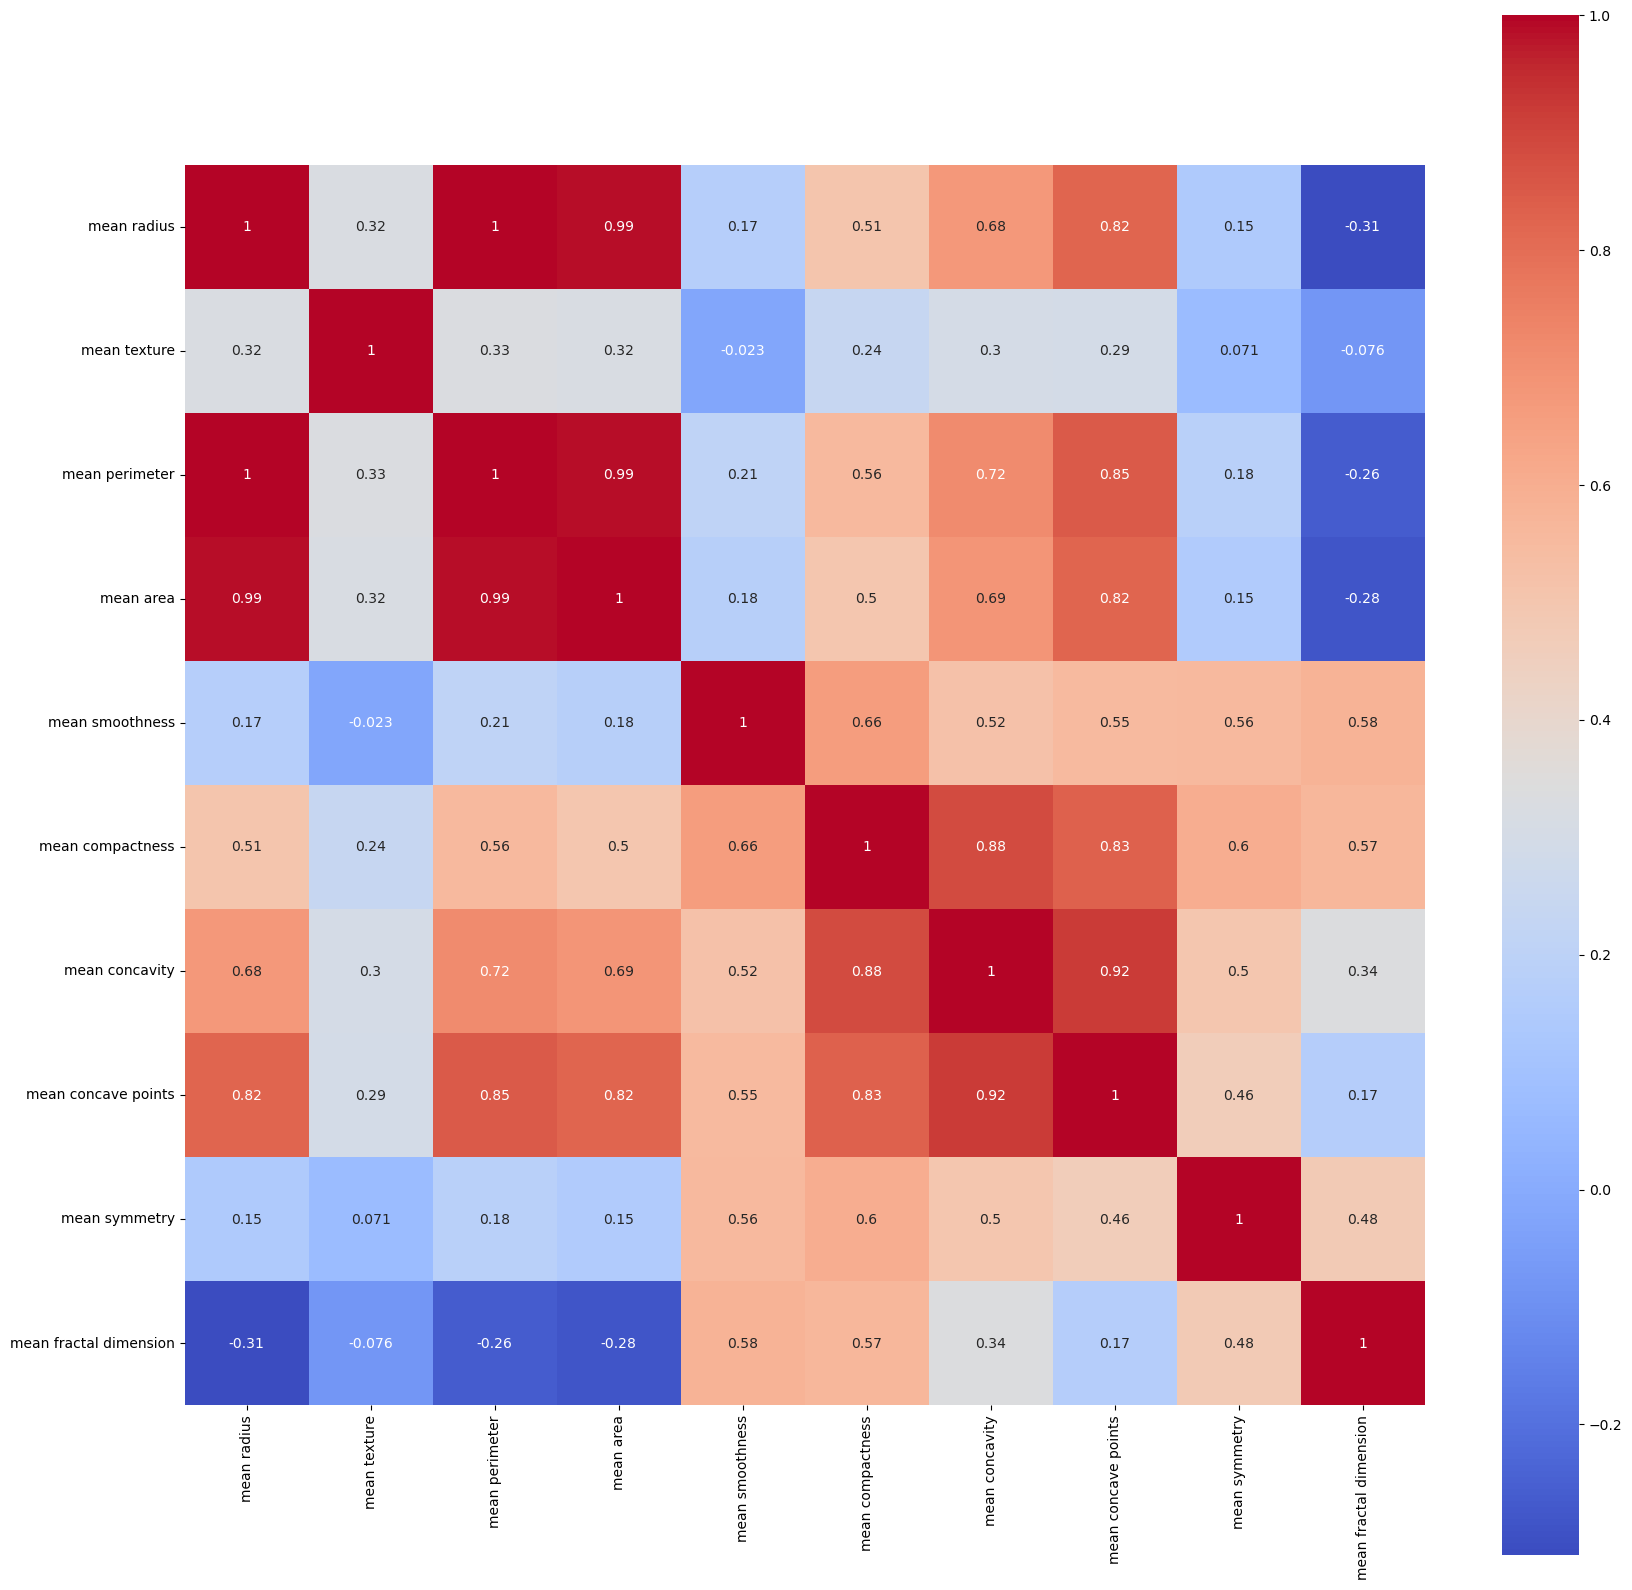

In [9]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df[breast_cancer.feature_names[0:10]].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

## Preparing the dataset

Just like scikit-learn, Keras, takes as inputs the following objects:
 *  <h3>Design matrix $X$</h3>
 an `ndarray` of dimensions `[nb_examples, nb_features]` containing the distributions to be used as inputs to the model. Each row is an object to classify, each column corresponds to a specific variable.
 *  <h3>Target vector $y$</h3>
 an `array` of dimensions `[nb_examples]` containing the truth labels indicating the class each object belongs to (for classification), or the continuous target values (for regression).
 *  <h3>Weight vector $w$</h3>
 (optional) an `array` of dimensions `[nb_examples]` containing the weights to be assigned to each example

The indices of these objects must map to the same examples.

### Task 2: Create design matrix `X` and target vector `y` for the first 10 features. Split the data into 70% training data and 30% testing data
* How many examples of each class are present in the dataset?
* Which type does the design matrix have and how many data points are in it?
* How many examples of each class are present in the training set?


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X = X.iloc[:, 0:10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 10) (171, 10) (398,) (171,)


It is common practice to scale the inputs to neural nets such that they have approximately similar ranges. Without this step, you might end up with variables whose values span very different orders of magnitude. This will create problems in the NN convergence due to very wild fluctuations in the magnitude of the internal weights. To take care of the scaling, we use the `sklearn` `StandardScaler`. The [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) scales and shifts each feature individually so that the mean is 0 and the standard deviation is 1 afterwards.


*additional comments:*

For consistent testing of your models, you should fit the scalers to the training data only and transform the test data with the previously trained scaler. By this you take into account, that the test data set might include data points with feature values larger or smaller than the ones in the training set which reflects a more realistic scenario

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3 Training a dense neural network

## Neural network model

### Dense layer structure
 * Densely connected layer, where all inputs are connected to all outputs
 *  Linear transformation of the input vector $x \in \mathbb{R}^n$, which can be expressed using the $n \times m$ matrix $W \in \mathbb{R}^{n \times m}$ as:
<center> $u = Wx + b$ </center>
where $b \in \mathbb{R}^m$ is the bias unit

 *  All entries in both $W$ and $b$ are trainable
 *  In Keras:
 ```
tensorflow.keras.layers.Dense((
                    units,
                    activation=None,
                    use_bias=True,
                    kernel_initializer='glorot_uniform',
                    bias_initializer='zeros', kernel_regularizer=None,
                    bias_regularizer=None,
                    activity_regularizer=None,
                    kernel_constraint=None,
                    bias_constraint=None
)
```

 *  `input_dim` (or `input_shape`) are necessary arguments for the 1st layer of the net:

```python

# Build a simple sequential model with a dense layer
from tensorflow.keras.models import Sequential
model = Sequential()

from tensorflow.keras.layers import Dense
model.add(Dense(32, input_shape=(16,)))
# now the model will take as input arrays of shape (*, 16)
# and output arrays of shape (*, 32)

# after the first layer, you don't need to specify
# the size of the input anymore:
model.add(Dense(32))
 ```



### Activation functions
 *  Mathematical way of quantifying the activation state of a node $\rightarrow$ whether it's firing or not
 *  Non-linear activation functions are the key to Deep Learning
 *  Allow NNs to learn complex, non-linear transformations of the inputs
 *  Some common choices:

[]

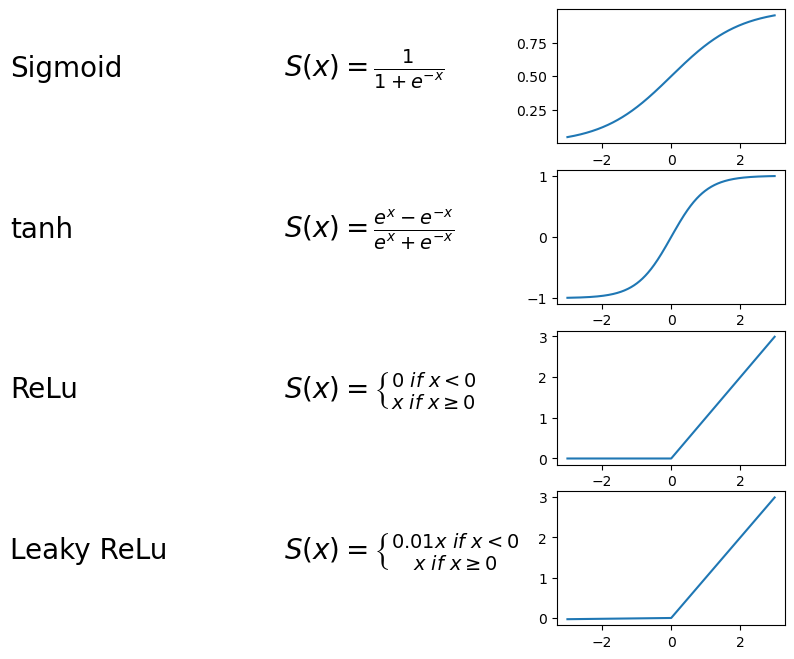

In [13]:
from math import exp
xrange = np.arange(-3,3,1e-2)

activation_functions = [
    ('Sigmoid', r'$S(x)=\frac{1}{1+e^{-x}}$', lambda x: 1/(1+exp(-x))),
    ('tanh', r'$S(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$', lambda x: (exp(x)-exp(-x))/((exp(x)+exp(-x)))),
    ('ReLu', r'$S(x)=\genfrac{\{}{}{0}{}{0 ~ if ~ x<0}{x ~ if ~ x\geq0}$', lambda x: x if x>= 0 else 0),
    ('Leaky ReLu', r'$S(x)=\genfrac{\{}{}{0}{}{0.01x ~ if ~ x<0}{x ~ if ~ x\geq0}$', lambda x: x if x>= 0 else 0.01*x),
]

rows=len(activation_functions)
fig = plt.figure(figsize=(10,2*rows))

row = 0
for label, formula, function in activation_functions:
  label_ax = fig.add_subplot(rows,3,3*row+1)
  label_ax.text(0, 0.5, label, fontsize=20)
  label_ax.set_clip_on(False)
  label_ax.axis('off')

  formula_ax = fig.add_subplot(rows,3,3*row+2)
  formula_ax.text(0, 0.5, formula, fontsize=20)
  formula_ax.set_clip_on(False)
  formula_ax.axis('off')

  function_ax = fig.add_subplot(rows,3,3*row+3)
  function_ax.plot(xrange,[ function(x) for x in xrange ])

  row += 1

plt.plot()


 [Learn how to use the activation functions in the model here.](https://keras.io/activations/)

 [Available activations:](https://keras.io/activations/#available-activations/)
* **softmax**, **elu**, **selu**, **softplus**, **softsign**, **relu**, **tanh**, **sigmoid**, **hard_sigmoid**,**exponential**, **linear**

 [Advanced Activation:](https://keras.io/layers/advanced-activations/)
* **LeakyReLU**, **PReLU**, **ThresholdedReLU**,


### Loss functions
* Mathematical way of quantifying how much ŷ deviates from y
* Dictates how strongly we penalize certain types of mistakes
* Cost of inaccurately classifying an event
* Many loss functions available in kears (https://keras.io/losses/)
* the loss function needs to be chosen depending on the problem. A commonly used loss for regression is **mse** (mean squared error), a common loss for classification is **binary-crossentropy** (also known as log-likelihood-loss)

## Build a simple neural network

In [14]:
class simple_nn():
    def __init__(self, input_shape, num_dense_layers, num_neurons, activation_function):
        self.input_shape = input_shape
        self.num_dense_layers = num_dense_layers
        self.num_neurons = num_neurons
        self.activation_function = activation_function

        self.model = self.build_model()

    def build_model(self):
        input = tf.keras.layers.Input(shape=(self.input_shape))
        x = tf.keras.layers.Dense(self.num_neurons, activation=self.activation_function)(input)
        for i in range(1, self.num_dense_layers-1):
            x = tf.keras.layers.Dense(self.num_neurons, activation=self.activation_function)(x)
        output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
        model = tf.keras.Model(inputs=input, outputs=output)
        return model

In [23]:
model = simple_nn(input_shape=X_train.shape[1], num_dense_layers=3, num_neurons=10, activation_function='relu')

model = model.build_model()

Let's visualize our net:

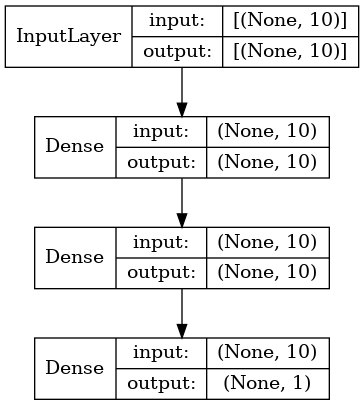

In [25]:
from IPython.display import Image
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)
Image('model_plot.png')

Another nice tool for more complicated models is Net2Vis: https://viscom.net2vis.uni-ulm.de/

OK, that is a rather simple model, but let's define a loss function, an optimizer, a performance metric and compile it:

*additional comments:*

To "compile" a model in Keras mainly referrs to making it ready for the training methods. This includes collecting the trainable weights of the model and configuring the optimizer with the weights and the according loss.

In [26]:
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'accuracy'])

### Training

In order to train the model, we pass the training data to the fit function. However, part of the training data will be used as validation data, which is used during the training to evaluate the training process.

The fit method returns an object containing the training progress including the specified loss and passed metrics. We will save it in a variable called history. The actual progress will be available in a dict in history.history, you will work with it after the training.

In [27]:
# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, batch_size=8)

Epoch 1/100
35/35 [==============================] - 2s 11ms/step - loss: 0.2827 - mae: 0.5243 - accuracy: 0.2986 - val_loss: 0.2522 - val_mae: 0.4910 - val_accuracy: 0.4167
Epoch 2/100
35/35 [==============================] - 0s 6ms/step - loss: 0.2354 - mae: 0.4742 - accuracy: 0.4281 - val_loss: 0.2172 - val_mae: 0.4497 - val_accuracy: 0.6000
Epoch 3/100
35/35 [==============================] - 0s 5ms/step - loss: 0.2030 - mae: 0.4346 - accuracy: 0.6978 - val_loss: 0.1895 - val_mae: 0.4131 - val_accuracy: 0.7917
Epoch 4/100
35/35 [==============================] - 0s 6ms/step - loss: 0.1728 - mae: 0.3946 - accuracy: 0.8777 - val_loss: 0.1607 - val_mae: 0.3740 - val_accuracy: 0.8583
Epoch 5/100
35/35 [==============================] - 0s 6ms/step - loss: 0.1388 - mae: 0.3474 - accuracy: 0.9173 - val_loss: 0.1291 - val_mae: 0.3268 - val_accuracy: 0.8750
Epoch 6/100
35/35 [==============================] - 0s 6ms/step - loss: 0.1056 - mae: 0.2917 - accuracy: 0.9245 - val_loss: 0.1016 - 

During the training process we have saved the loss and the accuracy of the training and validation data:

In [28]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'accuracy', 'val_loss', 'val_mae', 'val_accuracy'])


We can now plot the loss evolution over the training epochs for the training and validation dataset:

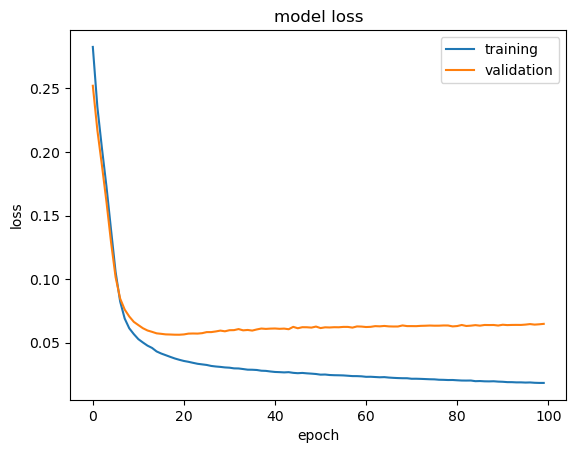

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

*additional comments*:
If you run the cell containing the training again, it will pick up where it stopped before. The optimizer still holds the trained weights from before, the model is not reset. If you want to really restart the training, you either need to build your model again.

Similarly, we can plot the accuracy

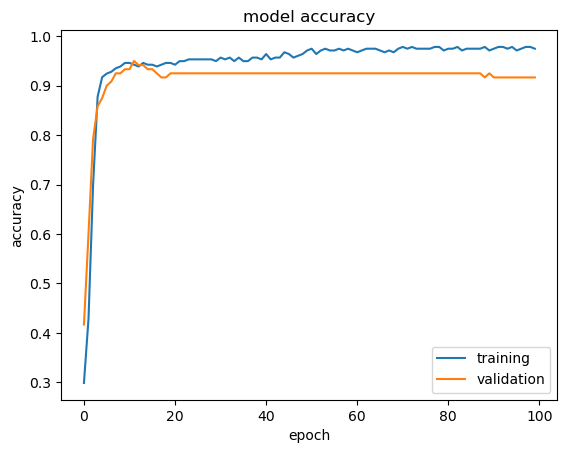

In [30]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

### Evaluation

Let's evaluate the loss and accuracy on our test data:

In [31]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=8)
print(loss_and_metrics)

22/22 [==============================] - 0s 4ms/step - loss: 0.0359 - mae: 0.0666 - accuracy: 0.9474
[0.03588268160820007, 0.0665568932890892, 0.9473684430122375]


Let's predict classes for our test data:

In [32]:
print('Testing...')
y_pred = model.predict(X_test, verbose = True, batch_size=8)

Testing...
22/22 [==============================] - 0s 1ms/step


In [33]:
# predictions
y_pred

array([[9.51894999e-01],
       [6.20332721e-04],
       [2.62927078e-03],
       [9.90660250e-01],
       [9.98938262e-01],
       [2.81842622e-11],
       [3.30231975e-09],
       [1.27602965e-01],
       [9.21603978e-01],
       [9.86990869e-01],
       [8.49150300e-01],
       [1.74254961e-02],
       [3.32313240e-01],
       [7.02776524e-05],
       [9.99028325e-01],
       [1.71952337e-08],
       [9.58156347e-01],
       [9.93468285e-01],
       [9.99990582e-01],
       [2.11758913e-08],
       [9.97004211e-01],
       [9.61965978e-01],
       [1.29202773e-10],
       [9.98649776e-01],
       [9.96435165e-01],
       [7.59670258e-01],
       [9.96889889e-01],
       [9.48322773e-01],
       [9.75322545e-01],
       [1.03472157e-04],
       [9.87735093e-01],
       [9.99163628e-01],
       [9.99233842e-01],
       [9.89218354e-01],
       [9.97884810e-01],
       [9.85217512e-01],
       [1.46527186e-01],
       [9.98890102e-01],
       [6.01898995e-04],
       [5.88906348e-01],


### Task 3: Plot the output prediction for malignant and benign breast cancer showing the separation between these two classes.

Text(0, 0.5, 'True Values')

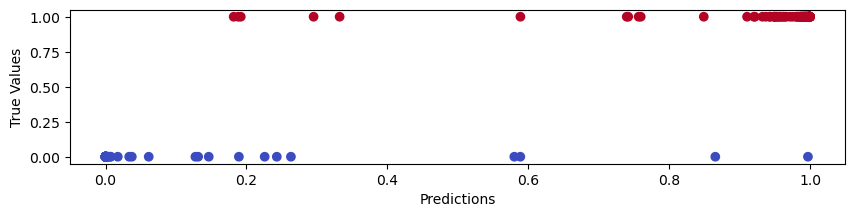

In [45]:
plt.figure(figsize=(10,2))
plt.scatter(y_pred, y_test, c=y_test, cmap='coolwarm')
plt.xlabel('Predictions')
plt.ylabel('True Values')

How do we decide now to which class the test example needs to assigned based on our prediction? Intuitively, we could simply convert our predictions into classes by using a threshold of 0.5:

In [46]:
y_cls=np.where(y_pred > 0.5, 1, 0)
print(y_cls)

[[1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]]


### Task 4: Use the scikit learn metrics to evaluate the model
*hints:*
- remember to import e. g. accuracy_score, precision_score, recall_score, classification_report from the metrics module from sklearn

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

print('Accuracy:', accuracy_score(y_test, y_cls))
print('Precision:', precision_score(y_test, y_cls))
print('Recall:', recall_score(y_test, y_cls))
print(classification_report(y_test, y_cls))

Accuracy: 0.9473684210526315
Precision: 0.9626168224299065
Recall: 0.9537037037037037
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        63
           1       0.96      0.95      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



Now, let's use scikit learn also to plot the ROC curve and calculate the AUC. An understandable article on what the ROC and AUC are, can be found [here](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc).

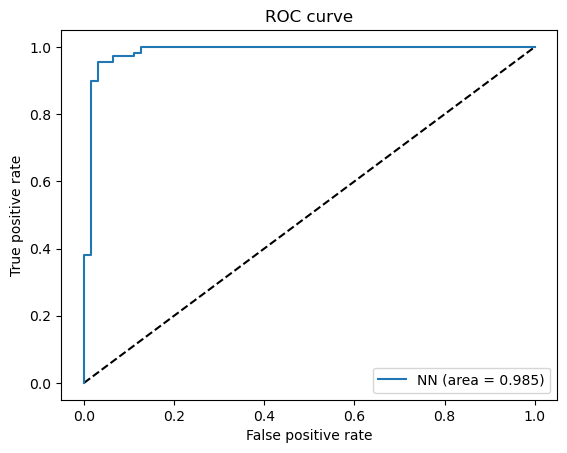

In [49]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred.ravel())
auc = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='NN (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Task 5 (Bonus): Change the neural network model and study the impact on the performance
* Make the neural network wider
* Make the neural network deeper
* Change the activation function of the hidden nodes
* Change the activation function of the output node
* Change the loss function, which ones are allowed?
* Which neural network gives the best performance?

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

param_dist = {
    'num_dense_layers': [1, 2, 3],
    'num_neurons': [5, 10, 15, 20],
    'activation_function': ['relu', 'tanh', 'sigmoid', 'elu']
}


def create_model(num_dense_layers, num_neurons, activation_function):
    model_instance = simple_nn(input_shape=X_train.shape[1], num_dense_layers=num_dense_layers, num_neurons=num_neurons, activation_function=activation_function)
    model = model_instance.build_model()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # or 'categorical_crossentropy' for multi-class problems
    return model

keras_model = KerasClassifier(build_fn=create_model, verbose=0)

random_search = RandomizedSearchCV(keras_model, param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=1)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


2024-05-02 00:11:48.545682: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-02 00:11:48.546363: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-02 00:11:48.547842: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-02 00:11:48.555750: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-02 00:11:48.561677: E external/local_xla/xla/

ValueError: Invalid parameter num_neurons for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(num_neurons=20)`
Check the list of available parameters with `estimator.get_params().keys()`